EECS 3401 Assignment 2
Tom Sun

Task 1: Import the adult dataset from the ucimlrepo.

In [37]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

Task 2: Take a quick look at the data structure

In [3]:
print(X.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country  
0          2174             0              40  United-States  
1             0             0              13  United-St

In [4]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB
None


In [5]:
print(X.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [6]:
print(X.shape)

(48842, 14)


Task 3: There are missing values in this dataset that are entered as ?, check for the number of these missing values.

In [7]:
(X=="?").sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
dtype: int64

Task 4: Replace the missing values you found in the previous step with null (nan).

In [8]:
X = X.replace("?", np.nan)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


Task 5: Create and apply a preprocessing pipeline

In [9]:
# separate numerical and categorical
num_vals = X.select_dtypes(include='number').columns
cat_vals = X.select_dtypes(exclude='number').columns

In [10]:
# make 2 pipelines
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(sparse_output=False))
])

In [11]:
# combine the 2 pipelines
final_pipe = ColumnTransformer([
    ('numerical', num_pipeline, num_vals),
    ('categorical', cat_pipeline, cat_vals),
])
X_prepared = final_pipe.fit_transform(X)
X_prepared.shape

(48842, 105)

Task 6: Check the target value_counts.

In [12]:
y.value_counts

<bound method DataFrame.value_counts of        income
0       <=50K
1       <=50K
2       <=50K
3       <=50K
4       <=50K
...       ...
48837  <=50K.
48838  <=50K.
48839  <=50K.
48840  <=50K.
48841   >50K.

[48842 rows x 1 columns]>

Task 7: Remove the period at the end of the >50K. and <=50K. i.e., replace all instances that are <=50K. with <=50K , and replace all the instances that are >50K. with >50K

In [13]:
y = y.replace('>50K.', '>50K')
y = y.replace('<=50K.', '<=50K')
y.value_counts

<bound method DataFrame.value_counts of       income
0      <=50K
1      <=50K
2      <=50K
3      <=50K
4      <=50K
...      ...
48837  <=50K
48838  <=50K
48839  <=50K
48840  <=50K
48841   >50K

[48842 rows x 1 columns]>

Task 8: Split the data into 80% training set and 20% testing set, print the shape of X_train, X_test, y_train, y_test in one command.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(39073, 105) (9769, 105) (39073, 1) (9769, 1)


Task 9: Train a svm model (svc) to predict if the income of the adult exceeds 50K on the training set

In [27]:
model_svm = SVC(kernel='poly', C=0.1, gamma=1)
model_svm.fit(X_train[:10000], y_train[:10000].values.ravel())
y_predict = model_svm.predict(X_test)

In [28]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       <=50K       0.87      0.89      0.88      7443
        >50K       0.63      0.58      0.60      2326

    accuracy                           0.82      9769
   macro avg       0.75      0.74      0.74      9769
weighted avg       0.81      0.82      0.82      9769



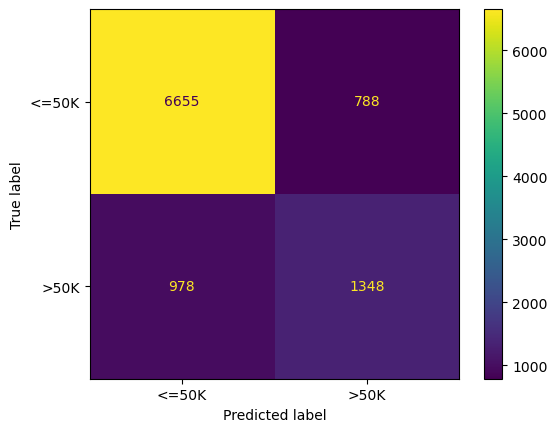

In [31]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

Task 10: Use GridSearchCV to find the best value of kernel, gamma, and C.

In [36]:
# split dataset 
X_train, X_validation_test, y_train, y_validation_test = train_test_split(X_prepared, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test, = train_test_split(X_validation_test, y_validation_test, test_size=0.5, random_state=42)
print(X_train.shape, y_train.shape, X_validation.shape, y_validation.shape, X_test.shape, y_test.shape)

(29305, 105) (29305, 1) (9768, 105) (9768, 1) (9769, 105) (9769, 1)


In [40]:
# pass in hyperparameters
svm_parameters = {'kernel': ['rbf'],
                    'C': [0.01, 0.1, 1, 10],
                    'gamma': [0.01, 1, 10]
                 }
svm = SVC() 
svm_gs = GridSearchCV(estimator = svm, param_grid = svm_parameters)
svm_gs.fit(X_train[:10000], y_train[:10000].values.ravel())
svm_winner = svm_gs.best_estimator_
svm_winner.score(X_validation, y_validation)

0.8472563472563472